## Quantile loss

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(55)
X_1d = np.linspace(0, 10, num=2000)
X = torch.tensor(X_1d, dtype=torch.float32).view(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3, size=X_1d.shape)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [3]:
#neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [4]:
# Custom quantile loss function
def quantile_loss(q, y, f):
    e = y - f
    return torch.max((q - 1) * e, q * e).mean()

In [5]:
# Initialize the model, optimizer, and quantile
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
quantile = 0.5  # For median regression

In [6]:
# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X)
    loss = quantile_loss(quantile, y, output)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.7737982273101807
Epoch 100, Loss: 0.7290332317352295
Epoch 200, Loss: 0.7069590091705322
Epoch 300, Loss: 0.7019047141075134
Epoch 400, Loss: 0.7025615572929382
Epoch 500, Loss: 0.7046046257019043
Epoch 600, Loss: 0.7019886374473572
Epoch 700, Loss: 0.7043489217758179
Epoch 800, Loss: 0.7050967216491699
Epoch 900, Loss: 0.7023955583572388


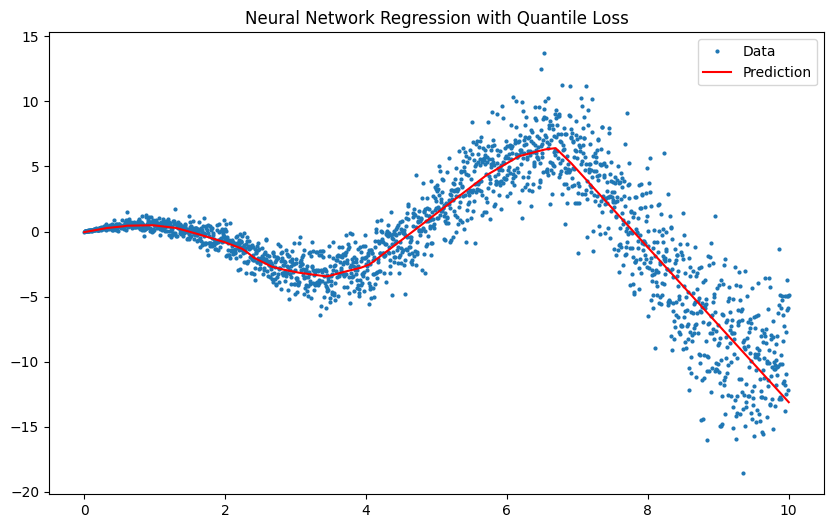

In [7]:
# Plot the results
with torch.no_grad():
    plt.figure(figsize=(10, 6))
    plt.plot(X_1d, y.numpy(), 'o', markersize=2, label='Data')
    plt.plot(X_1d, model(X).numpy(), 'r-', label='Prediction')
    plt.title('Neural Network Regression with Quantile Loss')
    plt.legend()
    plt.show()